In [1]:
!pip install scikit-plot
%matplotlib inline
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras import backend as K
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
def keras_internal_binary_classification_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))
def custom_accuracy(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp + tn)
    denominator = (tp + tn + fp + fn)

    return numerator / (denominator + K.epsilon())
from google.colab import files
uploaded = files.upload()
df = uploaded
df = pd.read_csv('train_pronto.csv')
df.drop(['Unnamed: 0', 'weekend'], axis = 1, inplace = True)
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Using TensorFlow backend.


Saving train_pronto.csv to train_pronto (1).csv


In [2]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform' ))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy,'accuracy'])
    return model
es = EarlyStopping(monitor='val_loss', patience=15)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)
model1 = build_model()
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10).history

model2 = build_model()
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=50).history

model3 = build_model()
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=100).history
test_loss_1, test_custom_acc_1, test_acc_1 = model1.evaluate(X_test, y_test, batch_size = 10)
test_loss_2, test_custom_acc_2, test_acc_2 = model2.evaluate(X_test, y_test, batch_size = 50)
test_loss_3, test_custom_acc_3, test_acc_3 = model3.evaluate(X_test, y_test, batch_size = 100)

print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_1, test_custom_acc_1, test_acc_1))
print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_2, test_custom_acc_2, test_acc_2))
print('Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss_3, test_custom_acc_3, test_acc_3))

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 2s 171us/step - loss: 0.1229 - custom_accuracy: 0.9525 - accuracy: 0.9525 - val_loss: 0.0842 - val_custom_accuracy: 0.9650 - val_accuracy: 0.9649
Epoch 2/500
11513/11513 [==============================] - 2s 174us/step - loss: 0.0594 - custom_accuracy: 0.9822 - accuracy: 0.9822 - val_loss: 0.0559 - val_custom_accuracy: 0.9818 - val_accuracy: 0.9818
Epoch 3/500
11513/11513 [==============================] - 2s 164us/step - loss: 0.0551 - custom_accuracy: 0.9854 - accuracy: 0.9854 - val_loss: 0.0488 - val_custom_accuracy: 0.9874 - val_accuracy: 0.9874
Epoch 4/500
11513/11513 [==============================] - 2s 163us/step - loss: 0.0514 - custom_accuracy: 0.9868 - accuracy: 0.9868 - val_loss: 0.0460 - val_custom_accuracy: 0.9891 - val_accuracy: 0.9891
Epoch 5/500
11513/11513 [==============================] - 2s 171us/step - loss: 0.0506 - custom_accuracy: 0.9878 - accuracy: 0.987

MODELLO NUMERO:  1
Accuracy 0.9896656534954408
F1-score [0.99323338 0.97813973]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935



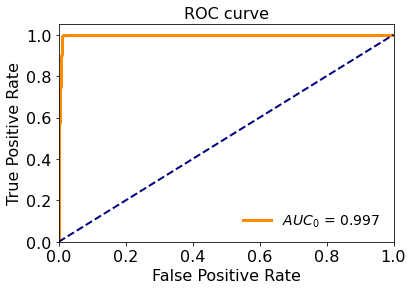

MODELLO NUMERO:  2
Accuracy 0.9892603850050659
F1-score [0.99296802 0.97728247]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935



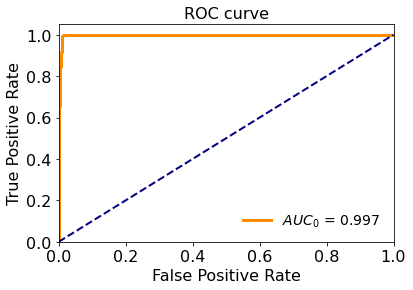

MODELLO NUMERO:  3
Accuracy 0.9894630192502533
F1-score [0.99309979 0.97772065]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935



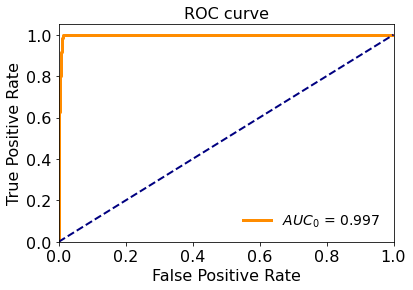

In [5]:
modelli = [model1, model2, model3]
k = 1
for i in modelli:
  print('MODELLO NUMERO: ',k)
  k +=1 
  y_pred = i.predict_classes(X_test)

  print('Accuracy %s' % accuracy_score(y_test, y_pred))
  print('F1-score %s' % f1_score(y_test, y_pred, average=None))
  print(classification_report(y_test, y_pred))
  y_score = i.predict_proba(X_test)
  fpr0, tpr0, _ = roc_curve(y_test, y_score)
  roc_auc0 = auc(fpr0, tpr0)
  plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.title('ROC curve', fontsize=16)
  plt.legend(loc="lower right", fontsize=14, frameon=False)
  plt.tick_params(axis='both', which='major', labelsize=16)
  plt.show()
  

TypeError: ignored

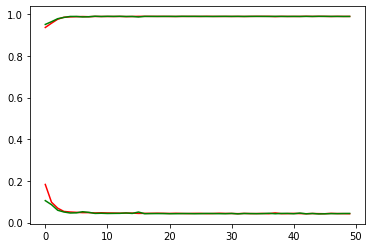

In [12]:
plt.plot(history2['accuracy'][:50], color = 'red', label = 'train loss & accuracy')
plt.plot(history2['loss'][:50], color = 'red' )
plt.plot(history2['val_accuracy'][:50], color = 'green', label = 'test loss & accuracy')
plt.plot(history2['val_loss'][:50], color = 'green')
plt.xlabel("Epochs")
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy through epochs')
plt.legend()
plt.show() 

In [14]:
from keras.regularizers import l2
from keras.regularizers import l1
def build_L2_model():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.001) ))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
def build_L2_model1():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform', kernel_regularizer=l2(0.01) ))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
L2_1 = build_L2_model()
L2_hist = L2_1.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500).history
L2_2 = build_L2_model1()
L2_hist2 = L2_2.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500).history
test_loss, test_custom_acc, test_acc = L2_1.evaluate(X_test, y_test, batch_size = 10)
test_loss1, test_custom_acc1, test_acc1 = L2_1.evaluate(X_test, y_test, batch_size = 50)
test_loss2, test_custom_acc2, test_acc2 = L2_1.evaluate(X_test, y_test, batch_size = 100)
test_loss3, test_custom_acc3, test_acc3 = L2_1.evaluate(X_test, y_test, batch_size = 150)
test_loss4, test_custom_acc4, test_acc4 = L2_1.evaluate(X_test, y_test, batch_size = 200)
test_loss5, test_custom_acc5, test_acc5 = L2_2.evaluate(X_test, y_test, batch_size = 10)
test_loss6, test_custom_acc6, test_acc6 = L2_2.evaluate(X_test, y_test, batch_size = 50)
test_loss7, test_custom_acc7, test_acc7 = L2_2.evaluate(X_test, y_test, batch_size = 100)
test_loss8, test_custom_acc8, test_acc8 = L2_2.evaluate(X_test, y_test, batch_size = 150)
test_loss9, test_custom_acc9, test_acc9 = L2_2.evaluate(X_test, y_test, batch_size = 200)

print('numero 1:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss, test_custom_acc, test_acc))
print('numero 2:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss1, test_custom_acc1, test_acc1))
print('numero 3:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss2, test_custom_acc2, test_acc2))
print('numero 4:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss3, test_custom_acc3, test_acc3))
print('numero 5:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss4, test_custom_acc4, test_acc4))
print('numero 6:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss5, test_custom_acc5, test_acc5))
print('numero 7:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss6, test_custom_acc6, test_acc6))
print('numero 8:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss7, test_custom_acc7, test_acc7))
print('numero 9:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss8, test_custom_acc8, test_acc8))
print('numero 10:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss9, test_custom_acc9, test_acc9))

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 1s 63us/step - loss: 0.2797 - custom_accuracy: 0.9186 - accuracy: 0.9186 - val_loss: 0.1309 - val_custom_accuracy: 0.9494 - val_accuracy: 0.9491
Epoch 2/500
11513/11513 [==============================] - 1s 58us/step - loss: 0.1063 - custom_accuracy: 0.9594 - accuracy: 0.9594 - val_loss: 0.0897 - val_custom_accuracy: 0.9702 - val_accuracy: 0.9700
Epoch 3/500
11513/11513 [==============================] - 1s 55us/step - loss: 0.0879 - custom_accuracy: 0.9740 - accuracy: 0.9740 - val_loss: 0.0764 - val_custom_accuracy: 0.9752 - val_accuracy: 0.9751
Epoch 4/500
11513/11513 [==============================] - 1s 51us/step - loss: 0.0796 - custom_accuracy: 0.9796 - accuracy: 0.9796 - val_loss: 0.0793 - val_custom_accuracy: 0.9736 - val_accuracy: 0.9735
Epoch 5/500
11513/11513 [==============================] - 1s 52us/step - loss: 0.0758 - custom_accuracy: 0.9825 - accuracy: 0.9825 - v

In [20]:
best_L2_model = build_L2_model()
L2_best_hist = best_L2_model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500, batch_size = 150).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 0s 23us/step - loss: 0.3293 - custom_accuracy: 0.8921 - accuracy: 0.8919 - val_loss: 0.1404 - val_custom_accuracy: 0.9465 - val_accuracy: 0.9465
Epoch 2/500
11513/11513 [==============================] - 0s 12us/step - loss: 0.1190 - custom_accuracy: 0.9511 - accuracy: 0.9510 - val_loss: 0.1037 - val_custom_accuracy: 0.9559 - val_accuracy: 0.9558
Epoch 3/500
11513/11513 [==============================] - 0s 13us/step - loss: 0.0966 - custom_accuracy: 0.9625 - accuracy: 0.9625 - val_loss: 0.0868 - val_custom_accuracy: 0.9646 - val_accuracy: 0.9645
Epoch 4/500
11513/11513 [==============================] - 0s 12us/step - loss: 0.0770 - custom_accuracy: 0.9772 - accuracy: 0.9772 - val_loss: 0.0755 - val_custom_accuracy: 0.9735 - val_accuracy: 0.9735
Epoch 5/500
11513/11513 [==============================] - 0s 12us/step - loss: 0.0706 - custom_accuracy: 0.9815 - accuracy: 0.9816 - v

TypeError: ignored

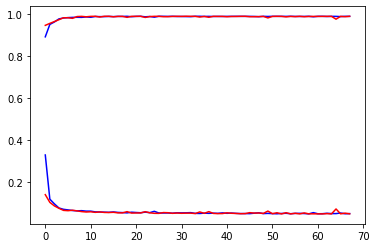

In [21]:
plt.plot(L2_best_hist['accuracy'], color = 'blue', label = 'loss and accuracy on training')
plt.plot(L2_best_hist['loss'], color = 'blue')
plt.plot(L2_best_hist['val_loss'], color = 'red', label = 'Loss and accuracy on test')
plt.plot(L2_best_hist['val_accuracy'], color = 'red')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Loss and accuracy with best L2 model')
plt.show()

In [0]:
from keras.layers import Dropout

In [24]:
def build_DROPOUT_model():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
def build_DROPOUT_model1():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
def build_DROPOUT_model2():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
def build_DROPOUT_model3():
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dropout(0.25))
    model.add(Dense(16, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform' ))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[custom_accuracy, 'accuracy'])
    return model
dropout = build_DROPOUT_model()
dropout_hist = dropout.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500).history
dropout2 = build_DROPOUT_model1()
dropout2_hist = dropout2.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500).history
dropout3 = build_DROPOUT_model2()
dropout3_hist = dropout3.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500).history
dropout4 = build_DROPOUT_model3()
dropout4_hist = dropout4.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500).history
test_loss, test_custom_acc, test_acc = dropout.evaluate(X_test, y_test, batch_size = 10)
test_loss1, test_custom_acc1, test_acc1 = dropout.evaluate(X_test, y_test, batch_size = 50)
test_loss2, test_custom_acc2, test_acc2 = dropout.evaluate(X_test, y_test, batch_size = 100)
test_loss3, test_custom_acc3, test_acc3 = dropout.evaluate(X_test, y_test, batch_size = 150)
test_loss4, test_custom_acc4, test_acc4 = dropout.evaluate(X_test, y_test, batch_size = 200)
test_loss5, test_custom_acc5, test_acc5 = dropout2.evaluate(X_test, y_test, batch_size = 10)
test_loss6, test_custom_acc6, test_acc6 = dropout2.evaluate(X_test, y_test, batch_size = 50)
test_loss7, test_custom_acc7, test_acc7 = dropout2.evaluate(X_test, y_test, batch_size = 100)
test_loss8, test_custom_acc8, test_acc8 = dropout2.evaluate(X_test, y_test, batch_size = 150)
test_loss9, test_custom_acc9, test_acc9 = dropout2.evaluate(X_test, y_test, batch_size = 200)
test_loss10, test_custom_acc10, test_acc10 = dropout3.evaluate(X_test, y_test, batch_size = 10)
test_loss11, test_custom_acc11, test_acc11 = dropout3.evaluate(X_test, y_test, batch_size = 50)
test_loss12, test_custom_acc12, test_acc12 = dropout3.evaluate(X_test, y_test, batch_size = 100)
test_loss13, test_custom_acc13, test_acc13 = dropout3.evaluate(X_test, y_test, batch_size = 150)
test_loss14, test_custom_acc14, test_acc14 = dropout3.evaluate(X_test, y_test, batch_size = 200)
test_loss15, test_custom_acc15, test_acc15 = dropout4.evaluate(X_test, y_test, batch_size = 10)
test_loss16, test_custom_acc16, test_acc16 = dropout4.evaluate(X_test, y_test, batch_size = 50)
test_loss17, test_custom_acc17, test_acc17 = dropout4.evaluate(X_test, y_test, batch_size = 100)
test_loss18, test_custom_acc18, test_acc18 = dropout4.evaluate(X_test, y_test, batch_size = 150)
test_loss19, test_custom_acc19, test_acc19 = dropout4.evaluate(X_test, y_test, batch_size = 200)
print('numero 1:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss, test_custom_acc, test_acc))
print('numero 2:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss1, test_custom_acc1, test_acc1))
print('numero 3:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss2, test_custom_acc2, test_acc2))
print('numero 4:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss3, test_custom_acc3, test_acc3))
print('numero 5:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss4, test_custom_acc4, test_acc4))
print('numero 6:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss5, test_custom_acc5, test_acc5))
print('numero 7:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss6, test_custom_acc6, test_acc6))
print('numero 8:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss7, test_custom_acc7, test_acc7))
print('numero 9:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss8, test_custom_acc8, test_acc8))
print('numero 10:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss9, test_custom_acc9, test_acc9))
print('numero 11:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss10, test_custom_acc10, test_acc10))
print('numero 12:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss11, test_custom_acc11, test_acc11))
print('numero 13:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss12, test_custom_acc12, test_acc12))
print('numero 14:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss13, test_custom_acc13, test_acc13))
print('numero 15:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss14, test_custom_acc14, test_acc14))
print('numero 16:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss15, test_custom_acc15, test_acc15))
print('numero 17:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss16, test_custom_acc16, test_acc16))
print('numero 18:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss17, test_custom_acc17, test_acc17))
print('numero 19:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss18, test_custom_acc18, test_acc18))
print('numero 20:','Loss %f, Custom Accuracy %f, Keras Accuracy %f' % (test_loss19, test_custom_acc19, test_acc19))

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 1s 70us/step - loss: 0.2756 - custom_accuracy: 0.9083 - accuracy: 0.9083 - val_loss: 0.1069 - val_custom_accuracy: 0.9538 - val_accuracy: 0.9536
Epoch 2/500
11513/11513 [==============================] - 1s 55us/step - loss: 0.1749 - custom_accuracy: 0.9442 - accuracy: 0.9442 - val_loss: 0.0893 - val_custom_accuracy: 0.9661 - val_accuracy: 0.9660
Epoch 3/500
11513/11513 [==============================] - 1s 59us/step - loss: 0.1442 - custom_accuracy: 0.9577 - accuracy: 0.9577 - val_loss: 0.0696 - val_custom_accuracy: 0.9754 - val_accuracy: 0.9753
Epoch 4/500
11513/11513 [==============================] - 1s 56us/step - loss: 0.1362 - custom_accuracy: 0.9638 - accuracy: 0.9639 - val_loss: 0.0621 - val_custom_accuracy: 0.9823 - val_accuracy: 0.9822
Epoch 5/500
11513/11513 [==============================] - 1s 63us/step - loss: 0.1186 - custom_accuracy: 0.9663 - accuracy: 0.9663 - v

In [25]:
best_dropout = build_DROPOUT_model1()
best_dropout_hist = best_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [es, mc], epochs=500).history

Train on 11513 samples, validate on 4935 samples
Epoch 1/500
11513/11513 [==============================] - 1s 73us/step - loss: 0.2399 - custom_accuracy: 0.8827 - accuracy: 0.8827 - val_loss: 0.1295 - val_custom_accuracy: 0.9496 - val_accuracy: 0.9493
Epoch 2/500
11513/11513 [==============================] - 1s 58us/step - loss: 0.1632 - custom_accuracy: 0.9390 - accuracy: 0.9391 - val_loss: 0.1245 - val_custom_accuracy: 0.9498 - val_accuracy: 0.9495
Epoch 3/500
11513/11513 [==============================] - 1s 57us/step - loss: 0.1492 - custom_accuracy: 0.9436 - accuracy: 0.9435 - val_loss: 0.0992 - val_custom_accuracy: 0.9617 - val_accuracy: 0.9615
Epoch 4/500
11513/11513 [==============================] - 1s 56us/step - loss: 0.1380 - custom_accuracy: 0.9481 - accuracy: 0.9481 - val_loss: 0.0845 - val_custom_accuracy: 0.9764 - val_accuracy: 0.9763
Epoch 5/500
11513/11513 [==============================] - 1s 58us/step - loss: 0.1260 - custom_accuracy: 0.9548 - accuracy: 0.9548 - v

TypeError: ignored

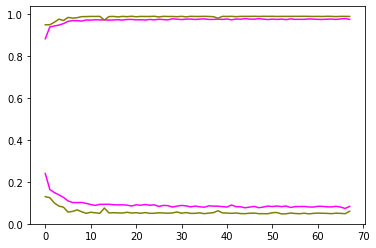

In [27]:
plt.plot(best_dropout_hist['loss'], color = 'magenta', label = 'train loss & accuracy')
plt.plot(best_dropout_hist['accuracy'], color = 'magenta')
plt.plot(best_dropout_hist['val_loss'], color = 'olive', label = 'Test loss & accuracy')
plt.plot(best_dropout_hist['val_accuracy'], color = 'olive')
plt.xlabel('Epochs')
plt.ylabel('BinaryCrossEntropy')
plt.title('Performance of best dropout model')
plt.legend()
plt.show()


MODELLO NUMERO:  1
Accuracy 0.9890577507598785
F1-score [0.99283249 0.97688356]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.98      4935
weighted avg       0.99      0.99      0.99      4935



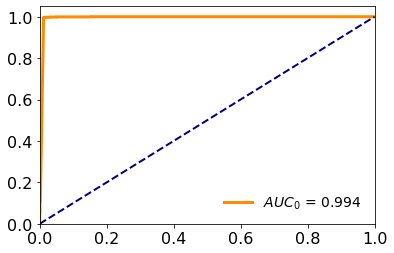

MODELLO NUMERO:  2
Accuracy 0.9894630192502533
F1-score [0.99310345 0.9776824 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935



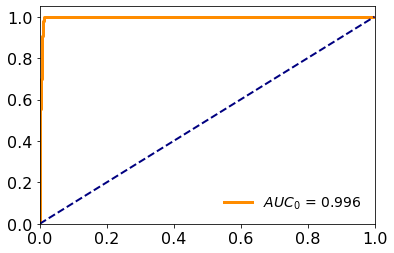

MODELLO NUMERO:  3
Accuracy 0.9896656534954408
F1-score [0.99323338 0.97813973]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935



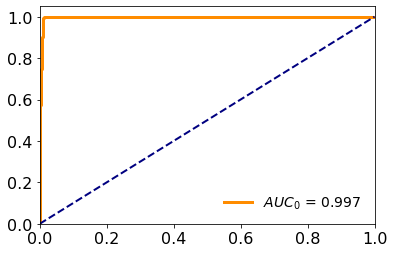

In [29]:
modelli = [best_dropout, best_L2_model, model1]
k = 1
for i in modelli:
  print('MODELLO NUMERO: ',k)
  k +=1 
  y_pred = i.predict_classes(X_test)

  print('Accuracy %s' % accuracy_score(y_test, y_pred))
  print('F1-score %s' % f1_score(y_test, y_pred, average=None))
  print(classification_report(y_test, y_pred))
  y_score = i.predict_proba(X_test)
  fpr0, tpr0, _ = roc_curve(y_test, y_score)
  roc_auc0 = auc(fpr0, tpr0)
  plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.legend(loc="lower right", fontsize=14, frameon=False)
  plt.tick_params(axis='both', which='major', labelsize=16)
  plt.show()

In [0]:
#DROPOUT BEST OF